In [82]:
import cv2
import pickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import os

In [2]:
# extract sift features

def extract_sift_features(image):
    sift = cv2.SIFT_create()
    key_points, descriptors = sift.detectAndCompute(image, None)
    return key_points, descriptors

In [80]:
plain_image_path = "../../../Dataset/train/Plain/"
plain_dump_path = "../Dataset/Resized_Images_256/Plain/"

pothole_image_path = "../../../Dataset/train/Pothole/"
pothole_dump_path = "../Dataset/Resized_Images_256/Pothole/"

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample data: strings of numbers
data = ["123 456 789", "456 789 123", "789 123 456"]

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(data)

# Get the feature names (numbers in this case)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to an array for better readability
matrix_array = X.toarray()

# Create a DataFrame for better visualization
import pandas as pd
df = pd.DataFrame(matrix_array, columns=feature_names)

# Display the DataFrame
print(df)


   123  456  789
0    1    1    1
1    1    1    1
2    1    1    1


In [149]:


# Sample text data
documents = [
    "1 2 3 4 9",
    "2 4 1",
]

# Initialize CountVectorizer


# Fit and transform
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit(documents)

X.fit_transform(documents).toarray()

# Convert to dense array
# histogram_array = X.toarray()


c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[1, 1, 1, 1, 1],
       [1, 1, 0, 1, 0]], dtype=int64)

In [79]:
# read image array grayscale color space
model = pickle.load(open("../Models and Data/Kmeans_Cluster_SIFT/kmeans_225.pickle", "rb"))
img_arr = cv2.imread("../Dataset/Resized_Images_256/Pothole/100.0_Pothole-in-road.png", 0)
reduced_descriptors = np.load("../Feature Extraction/reduced_descriptors.npy")
reduced_descriptors

# generate image descriptor classes
class_labels = model.predict(reduced_descriptors)
# # initialize and populate histogram with 115 descriptor classes
histogram_str = " ".join([str(x) for x in class_labels])
len(class_labels)
# # count vectorizer
# vectorizer = CountVectorizer()
# histogram = vectorizer.fit_transform([histogram_str])
# len(histogram.toarray()[0])

c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.1.3 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


353561

In [44]:
print("Unique class labels:", np.unique(class_labels))
print("Vocabulary:", vectorizer.vocabulary_.keys())

Unique class labels: [  0   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  54  56  57  59
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  78  79  80
  81  82  84  85  86  88  89  90  91  92  93  95  97  98  99 100 101 102
 103 104 105 106 107 108 110 111 112 113 114 115 116 117 119 120 121 122
 123 124 125 126 127 128 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 148 149 150 151 152 153 154 155 156 157 158 159 162
 163 164 166 167 168 169 170 171 173 174 175 176 177 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224]
Vocabulary: dict_keys(['137', '125', '21', '86', '193', '80', '67', '116', '101', '222', '182', '97', '127', '146', '90', '202', '144', '38', '91', '214',

In [141]:
from sklearn.cluster import KMeans

pothole_processed = [(pothole_dump_path + pothole_path) for pothole_path in os.listdir(pothole_dump_path)]
plain_processed = [(plain_dump_path + plain_path) for plain_path in os.listdir(plain_dump_path)]

def generateDescriptorHistograms(paths: list, labels: list, KMeansModel: KMeans, cluster_size: int) -> pd.DataFrame:
    pca = PCA(n_components=77) 
    data = []
    _max = 0

    # process plain images
    for i in range(len(paths)):
        for image_path in paths[i]:
            # read image array grayscale color space
            img_arr = cv2.imread(image_path, 0)

            # extract descriptors from image
            keypoints, descriptor = extract_sift_features(img_arr)

            if(descriptor.shape[0]) < 77:
                # print(image_path)
                continue

            # do pca on descriptors
            reduced_descriptors = pca.fit_transform(descriptor)

            # generate image descriptor classes
            class_labels = KMeansModel.predict(reduced_descriptors)

            # initialize and populate histogram with 115 descriptor classes
            histogram = np.zeros(cluster_size, dtype=int)
            histogram_cropped = np.bincount(class_labels)
            histogram[:len(histogram_cropped)] = np.logical_or(histogram_cropped,histogram[:len(histogram_cropped)]) * histogram_cropped

            # store data
            data.append({"Path":image_path, "Desc_Histogram":histogram, "Class":labels[i]})
    
    df = pd.DataFrame(data)
    return df

model = pickle.load(open("../Models and Data/Kmeans_Cluster_SIFT/kmeans_5.pickle", "rb"))
generateDescriptorHistograms(paths=[pothole_processed, plain_processed], labels=['Pothole','Plain'], KMeansModel=model, cluster_size=5)

c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KMeans from version 1.1.3 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


,Path,Desc_Histogram,Class
0,../Dataset/Resized_Images_256/Pothole/1.png,"[121, 164, 100, 147, 76]",Pothole
1,../Dataset/Resized_Images_256/Pothole/1.Pothol...,"[77, 98, 65, 125, 65]",Pothole
2,../Dataset/Resized_Images_256/Pothole/10.png,"[53, 58, 41, 53, 33]",Pothole
3,../Dataset/Resized_Images_256/Pothole/10._1066...,"[131, 154, 84, 139, 110]",Pothole
4,../Dataset/Resized_Images_256/Pothole/100.0_Po...,"[110, 253, 172, 219, 192]",Pothole
...,...,...,...
710,../Dataset/Resized_Images_256/Plain/93.son2132...,"[47, 50, 42, 45, 32]",Plain
711,../Dataset/Resized_Images_256/Plain/94.iStock-...,"[169, 234, 182, 226, 111]",Plain
712,../Dataset/Resized_Images_256/Plain/95.connema...,"[52, 80, 44, 53, 46]",Plain
713,../Dataset/Resized_Images_256/Plain/96.capture...,"[106, 119, 95, 95, 94]",Plain


In [243]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfTransformer
import joblib

pothole_processed = [(pothole_dump_path + pothole_path) for pothole_path in os.listdir(pothole_dump_path)]
plain_processed = [(plain_dump_path + plain_path) for plain_path in os.listdir(plain_dump_path)]

def generateDescriptorHistograms(paths: list, KMeansModel: KMeans) -> pd.DataFrame:
    pca = joblib.load('../Models and Data/pca_77.joblib') 
    descriptor_list = []
    class_list = []
    image_class = []

    # create array of image descriptors (not flattened)
    for i in range(len(paths)):
        for image_path in paths[i]:

            # read image array grayscale color space
            img_arr = cv2.imread(image_path, 0)

            # extract descriptors from image
            keypoints, descriptor = extract_sift_features(img_arr)

            # skip image because pca cannot be done
            if(descriptor.shape[0]) < 77:
                continue

            # add image descriptors
            descriptor_list.append(descriptor)

            # add image class
            if(i == 0):
                image_class.append("Pothole")
            else:
                image_class.append("Plain")
    
    for i in descriptor_list:
        reduced_descriptors = pca.fit_transform(i)
        class_labels = KMeansModel.predict(reduced_descriptors)
        class_list.append(class_labels)

    count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
    tfidf_transformer = TfidfTransformer()

    desc_classes = [" ".join(str(x) for x in i) for i in class_list]
    count_matrix = count_vectorizer.fit_transform(desc_classes)
    tfidf_matrix = tfidf_transformer.fit_transform(count_matrix)

    return count_matrix, tfidf_matrix, image_class

In [245]:
model = pickle.load(open("../Models and Data/Kmeans_Cluster_SIFT/kmeans_415.pickle", "rb"))
count_matrix, tfidf_matrix, image_class = generateDescriptorHistograms(paths=[pothole_processed, plain_processed], KMeansModel=model)

c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<class 'numpy.ndarray'>
Number of Keypoints Detected In The Training Image:  643
Number of Keypoints Detected In The Query Image:  33


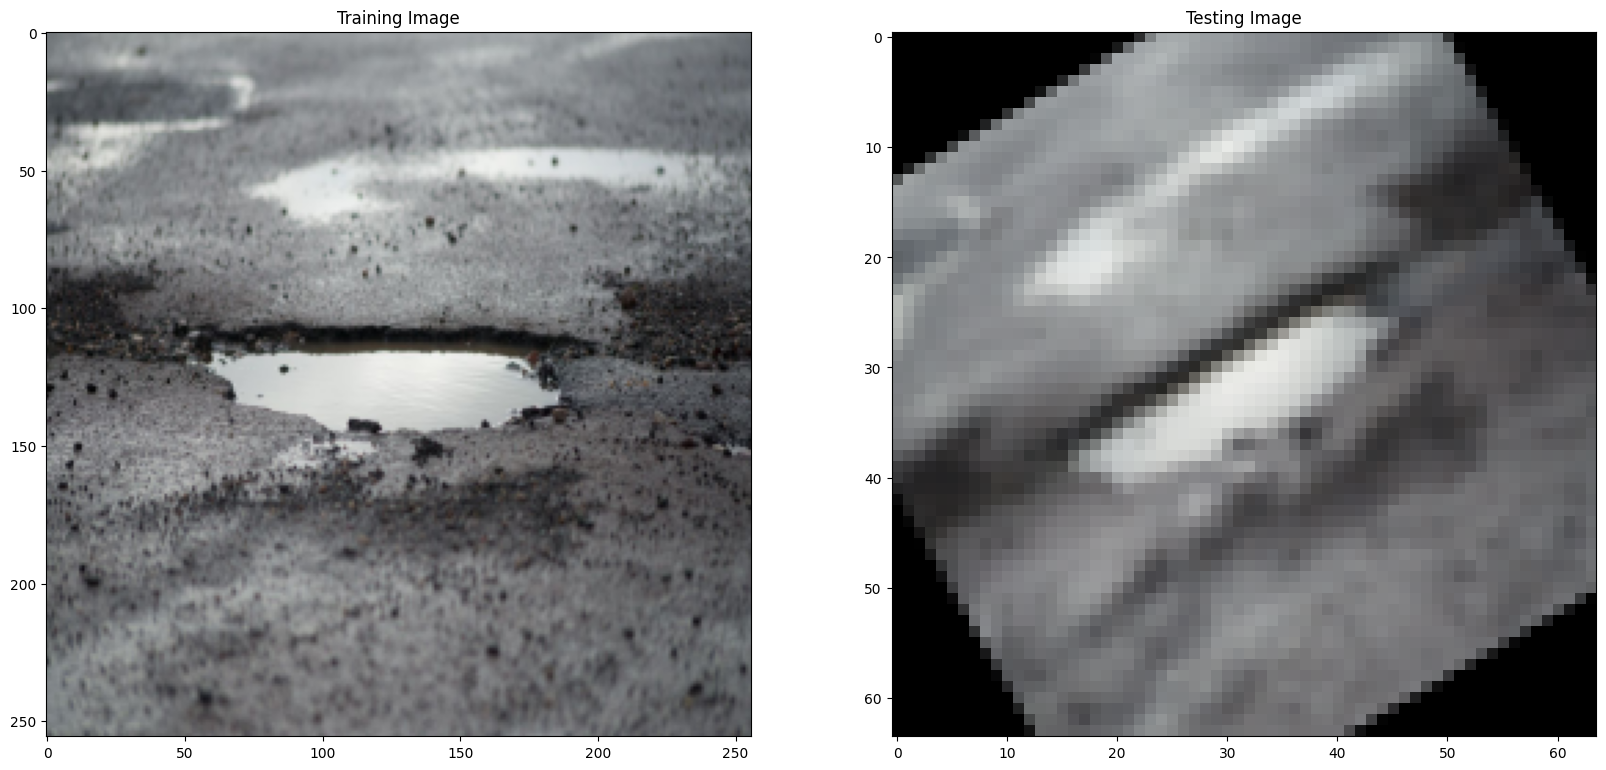

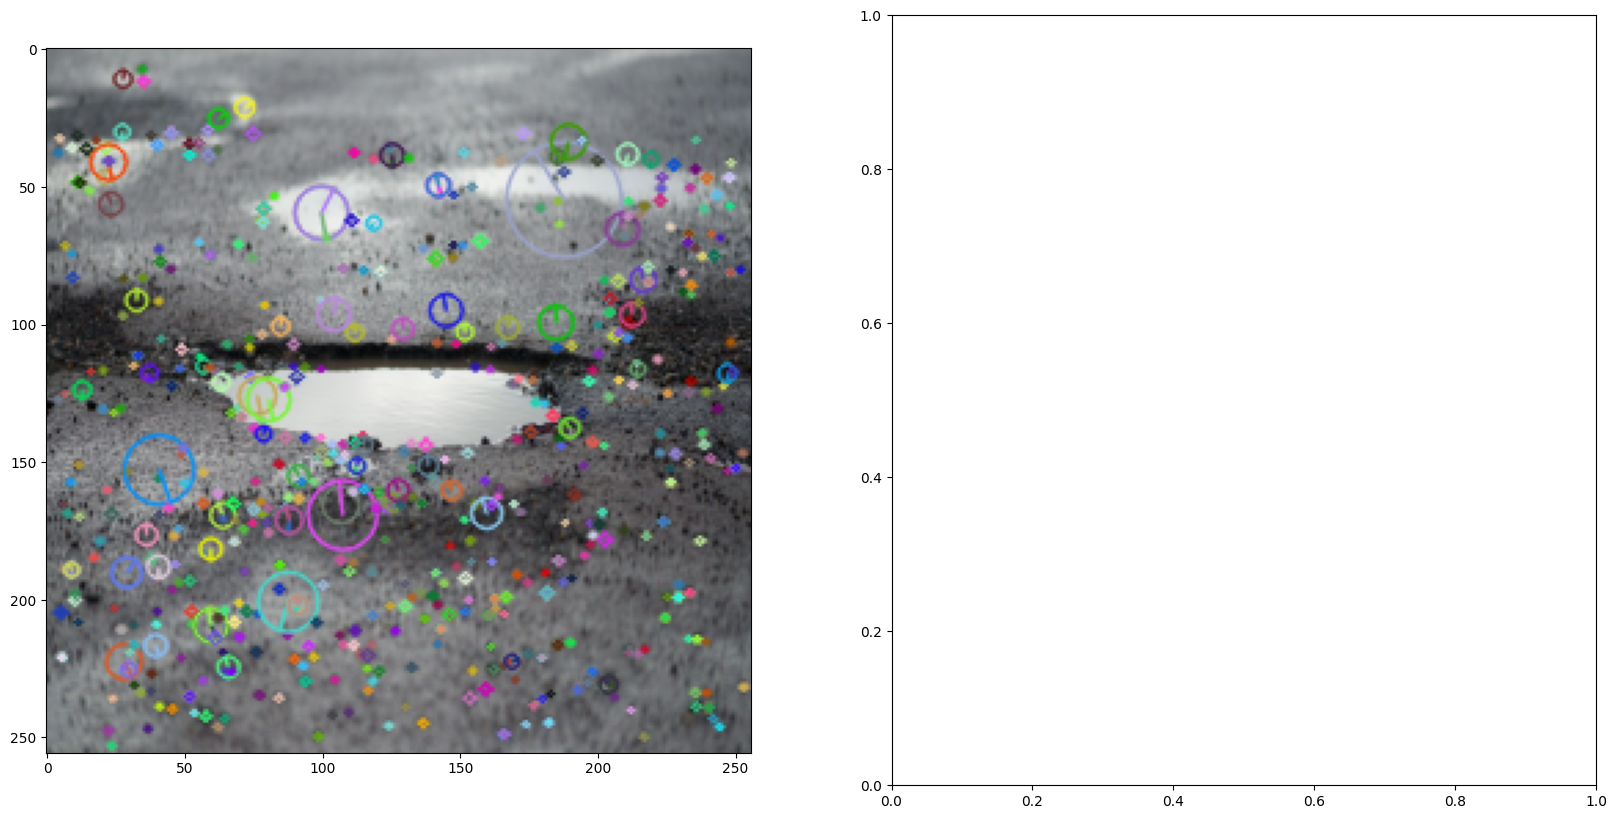

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('../Dataset/Sample Images/target.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)
sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)
print(type(test_descriptor))

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

# plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

# plots[1].set_title("Train keypoints Without Size")
# plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))
